<a href="https://colab.research.google.com/github/mariamamgad8/LinearRegression_And_LogisticRegression_Algorithms/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Set up Kaggle**

In [1]:
# Install kagglehub to download the dataset from Kaggle easily.
# Note: This is not part of the algorithm implementation, but is required for dataset handling.
!pip install kagglehub --quiet


In [2]:
# Import kagglehub to access datasets hosted on Kaggle
import kagglehub

# Download the "Salary Data - Simple Linear Regression" dataset from Kaggle
# This function downloads and extracts the dataset to a local path
path = kagglehub.dataset_download("karthickveerakumar/salary-data-simple-linear-regression")

# Print the local path where the dataset files have been saved
print("Path to dataset files:", path)


100%|██████████| 378/378 [00:00<00:00, 292kB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/karthickveerakumar/salary-data-simple-linear-regression/versions/1


# **Load and Prepare the Dataset**

In [3]:
# Import required libraries
import pandas as pd  # For data handling and manipulation
import os  # To work with file paths

# Build the full path to the CSV file inside the downloaded dataset folder
csv_path = os.path.join(path, "Salary_Data.csv")

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_path)

# Extract the feature (YearsExperience) as a list of lists
# We use double brackets to keep the shape (n, 1) for consistency with matrix operations
X = df[['YearsExperience']].values.tolist()

# Extract the target variable (Salary) as a simple list
y = df['Salary'].values.tolist()

# Display the first few rows of the dataset to verify it's loaded correctly
df.head()


,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


# **Define Linear Regression From Scratch**

In [4]:
# Define a class to implement Linear Regression from scratch
class LinearRegression:
    def __init__(self, learning_rate=0.01, epochs=1000, lambda_=0.0, method='batch'):
        # Initialize hyperparameters and internal variables
        self.learning_rate = learning_rate  # Step size for weight updates
        self.epochs = epochs  # Number of training iterations
        self.lambda_ = lambda_  # Regularization strength for Ridge
        self.method = method  # Training method: 'batch' or 'sgd'
        self.weights = []  # To store feature weights
        self.bias = 0.0  # To store bias term

    def predict(self, X):
        # Predict target values using the current weights and bias
        return [sum(w * x for w, x in zip(self.weights, x_row)) + self.bias for x_row in X]

    def compute_loss(self, y_true, y_pred):
        # Compute the loss using Mean Squared Error (MSE) with optional Ridge penalty
        n = len(y_true)
        mse = sum((yt - yp) ** 2 for yt, yp in zip(y_true, y_pred)) / n
        ridge = self.lambda_ * sum(w ** 2 for w in self.weights)  # Ridge regularization term
        return mse + ridge

    def fit(self, X, y):
        # Initialize weights and bias before training
        n_samples, n_features = len(X), len(X[0])
        self.weights = [0.0] * n_features  # Initialize weights to zero
        self.bias = 0.0  # Initialize bias

        # Call the appropriate training method
        if self.method == 'batch':
            self._fit_batch(X, y, n_samples, n_features)
        elif self.method == 'sgd':
            self._fit_sgd(X, y, n_samples, n_features)

    def _fit_batch(self, X, y, n_samples, n_features):
        # Train using Batch Gradient Descent
        for _ in range(self.epochs):
            y_pred = self.predict(X)
            dw = [0.0] * n_features  # Gradient for weights
            db = 0.0  # Gradient for bias

            # Accumulate gradients
            for i in range(n_samples):
                error = y_pred[i] - y[i]
                for j in range(n_features):
                    dw[j] += error * X[i][j]
                db += error

            # Update weights and bias
            for j in range(n_features):
                dw[j] = (dw[j] / n_samples) + 2 * self.lambda_ * self.weights[j]
                self.weights[j] -= self.learning_rate * dw[j]

            db /= n_samples
            self.bias -= self.learning_rate * db

    def _fit_sgd(self, X, y, n_samples, n_features):
        # Train using Stochastic Gradient Descent (SGD)
        import random
        for _ in range(self.epochs):
            for _ in range(n_samples):
                idx = random.randint(0, n_samples - 1)  # Random sample index
                x_i = X[idx]
                y_i = y[idx]

                # Compute prediction and error for the sampled instance
                y_pred_i = sum(w * x for w, x in zip(self.weights, x_i)) + self.bias
                error = y_pred_i - y_i

                # Update weights using the gradient and Ridge term
                for j in range(n_features):
                    grad_w = error * x_i[j] + 2 * self.lambda_ * self.weights[j]
                    self.weights[j] -= self.learning_rate * grad_w

                # Update bias
                self.bias -= self.learning_rate * error


# **Visualization Function**

In [7]:
import matplotlib.pyplot as plt
def visualize(X, y, y_pred, title, save_path=None):
    x_vals = [x[0] for x in X]
    plt.figure(figsize=(8, 5))
    plt.scatter(x_vals, y, color='blue', label='Actual')
    plt.plot(x_vals, y_pred, color='red', label='Predicted')
    plt.xlabel("Years of Experience")
    plt.ylabel("Salary")
    plt.title(title)
    plt.legend()
    plt.grid(True)

    if save_path:
        plt.savefig(save_path)
    plt.show()


# **Run the 4 Tests**

**(1) Loss Only**

Loss Only - Weights: [9876.112752879602] Bias: 22920.48554852225
Loss: 33053746.30651365


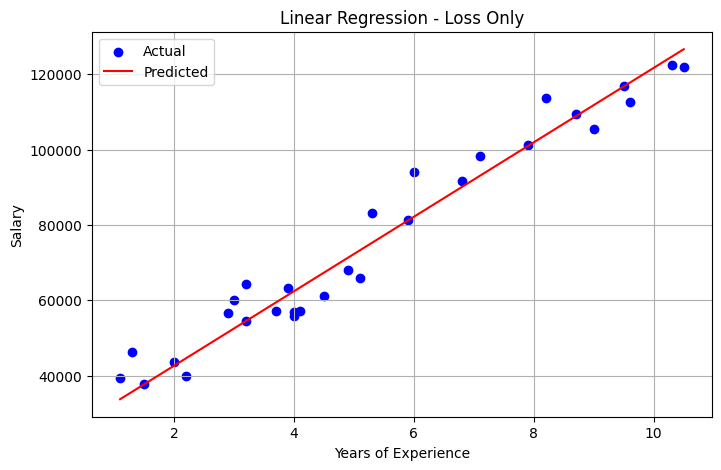

In [9]:
model_loss = LinearRegression(method="batch", lambda_=0)
model_loss.fit(X, y)
y_pred = model_loss.predict(X)

print("Loss Only - Weights:", model_loss.weights, "Bias:", model_loss.bias)
print("Loss:", model_loss.compute_loss(y, y_pred))
visualize(X, y, y_pred, "Linear Regression - Loss Only")


**(2) Ridge Regularization**

Ridge - Weights: [9641.030439987304] Bias: 24151.510980067687
Loss: 41241337.39273499


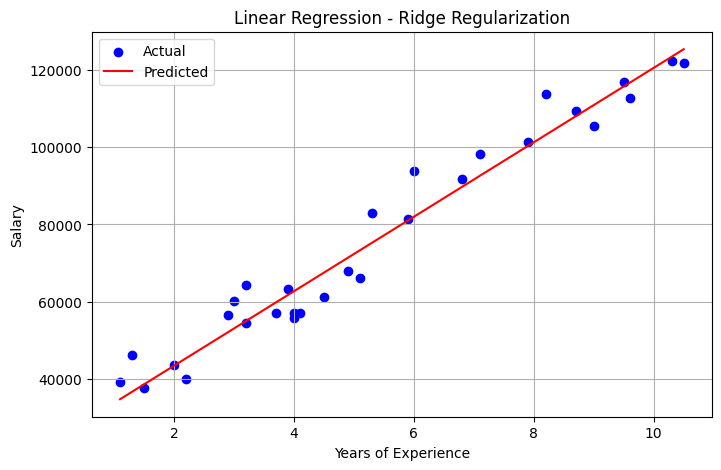

In [10]:
model_ridge = LinearRegression(method="batch", lambda_=0.1)
model_ridge.fit(X, y)
y_pred = model_ridge.predict(X)

print("Ridge - Weights:", model_ridge.weights, "Bias:", model_ridge.bias)
print("Loss:", model_ridge.compute_loss(y, y_pred))
visualize(X, y, y_pred, "Linear Regression - Ridge Regularization")


**(3) Batch Gradient Descent**

Batch GD - Weights: [9876.112752879602] Bias: 22920.48554852225
Loss: 33053746.30651365


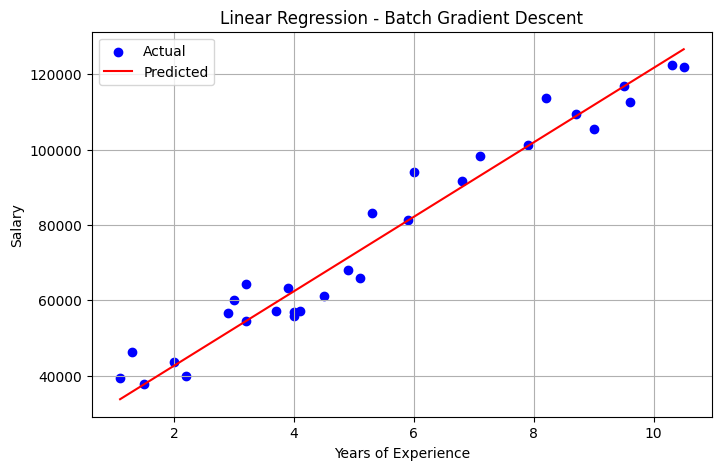

In [11]:
model_batch = LinearRegression(method="batch", lambda_=0)
model_batch.fit(X, y)
y_pred = model_batch.predict(X)

print("Batch GD - Weights:", model_batch.weights, "Bias:", model_batch.bias)
print("Loss:", model_batch.compute_loss(y, y_pred))
visualize(X, y, y_pred, "Linear Regression - Batch Gradient Descent")


**(4) Stochastic Gradient Descent**

SGD - Weights: [8912.787412477994] Bias: 25336.60361922509
Loss: 44472094.838519335


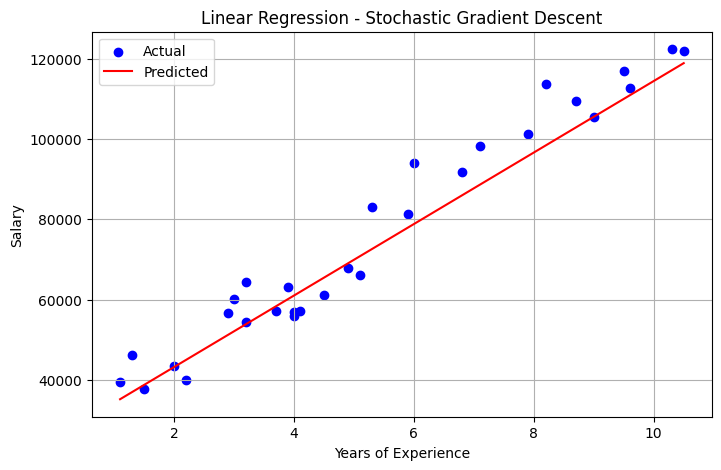

In [12]:
model_sgd = LinearRegression(method="sgd", lambda_=0)
model_sgd.fit(X, y)
y_pred = model_sgd.predict(X)

print("SGD - Weights:", model_sgd.weights, "Bias:", model_sgd.bias)
print("Loss:", model_sgd.compute_loss(y, y_pred))
visualize(X, y, y_pred, "Linear Regression - Stochastic Gradient Descent")


# **Linear Regression Using Scikit-learn**

**1. Linear Regression with Loss Only**

Loss (MSE) for Linear Regression with Loss only: 31270951.722280964


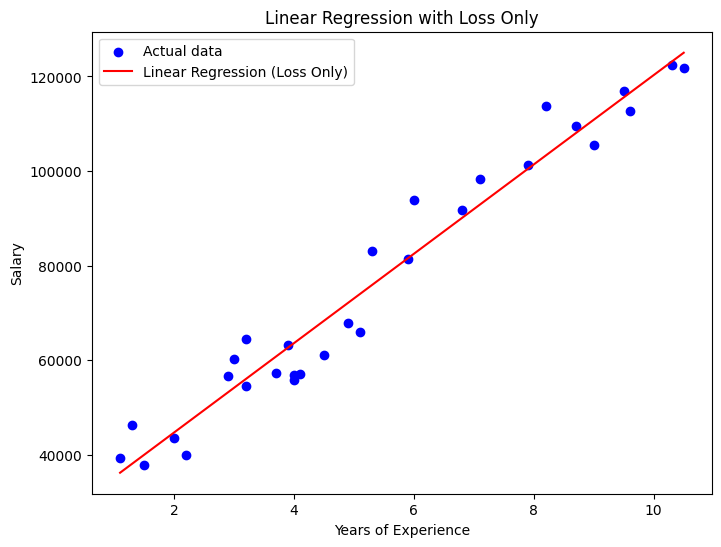

In [13]:
# Import necessary libraries
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize a Linear Regression model from scikit-learn (no regularization by default)
model_loss = LinearRegression()

# Train the model on the training data (Years of Experience vs. Salary)
model_loss.fit(X, y)

# Predict the salary values using the trained model
y_pred_loss = model_loss.predict(X)

# Calculate the Mean Squared Error (MSE) between actual and predicted salary
loss = mean_squared_error(y, y_pred_loss)
print(f"Loss (MSE) for Linear Regression with Loss only: {loss}")

# Plot the actual data points and the regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')  # Actual data points
plt.plot(X, y_pred_loss, color='red', label='Linear Regression (Loss Only)')  # Regression line
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression with Loss Only')
plt.legend()
plt.show()


**2. Linear Regression with Ridge Regularization**

Loss (MSE) for Linear Regression with Ridge Regularization: 31283588.585723426


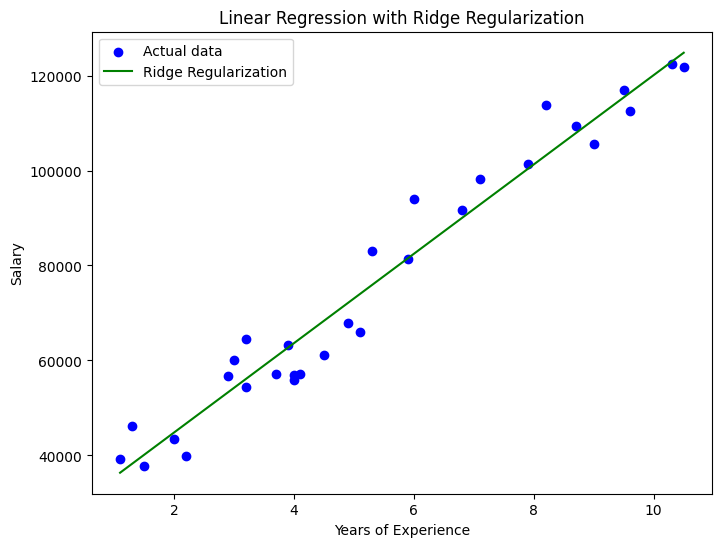

In [14]:
# Import necessary libraries
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize a Ridge Regression model with regularization strength alpha = 1.0
model_ridge = Ridge(alpha=1.0)

# Train the Ridge model on the training data (Years of Experience vs. Salary)
model_ridge.fit(X, y)

# Predict the salary values using the Ridge regression model
y_pred_ridge = model_ridge.predict(X)

# Calculate the Mean Squared Error (MSE) between actual and predicted salary
loss_ridge = mean_squared_error(y, y_pred_ridge)
print(f"Loss (MSE) for Linear Regression with Ridge Regularization: {loss_ridge}")

# Plot the actual data points and the Ridge regression line
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')  # Actual data points
plt.plot(X, y_pred_ridge, color='green', label='Ridge Regularization')  # Ridge regression line
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression with Ridge Regularization')
plt.legend()
plt.show()


**3. Linear Regression Using Batch Gradient Descent**

Loss (MSE) for Linear Regression using Batch Gradient Descent: 33053746.30651365


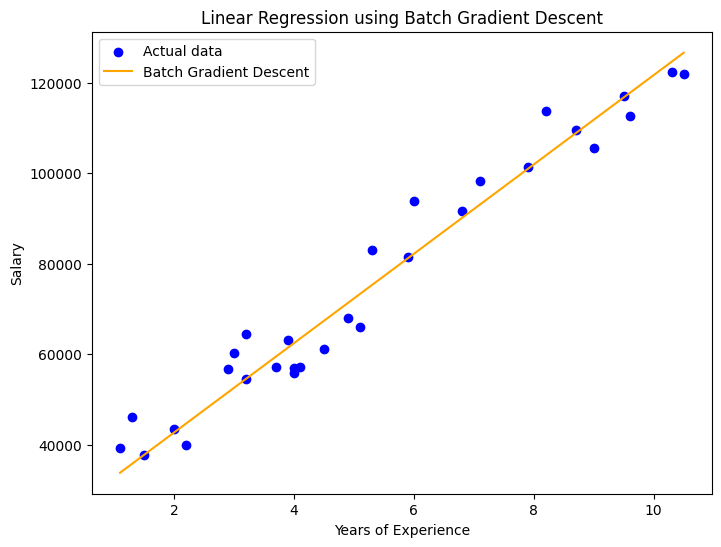

In [15]:
import numpy as np
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Batch Gradient Descent implementation
class BatchGradientDescent:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        X = np.array(X)  # Ensure X is a numpy array
        m = len(y)
        self.weights = np.zeros(X.shape[1])
        self.bias = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.weights) + self.bias
            dw = (1/m) * np.dot(X.T, (y_pred - y))
            db = (1/m) * np.sum(y_pred - y)

            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        X = np.array(X)  # Ensure X is a numpy array
        return np.dot(X, self.weights) + self.bias


# Load your salary and experience dataset from Kaggle
# Using the dataset: "karthickveerakumar/salary-data-simple-linear-regression"

import pandas as pd
import os
# Load the dataset
path =  os.path.join(path, "Salary_Data.csv")
df = pd.read_csv(path)

# Displaying the first few rows of the dataset
df.head()

# Extracting X (Years of Experience) and y (Salary)
X = df['YearsExperience'].values.reshape(-1, 1)  # Ensure X is a column vector
y = df['Salary'].values  # Target variable

# Initialize and train using Batch Gradient Descent
bgd = BatchGradientDescent(learning_rate=0.01, epochs=1000)
bgd.fit(X, y)

# Predictions for the original data points
y_pred_bgd = bgd.predict(X)

# Generate predictions for a range of X values for smoother curve
X_range = np.linspace(min(X), max(X), 100).reshape(-1, 1)  # From min to max experience, 100 points
y_range_pred = bgd.predict(X_range)

# Compute loss (MSE)
loss_bgd = mean_squared_error(y, y_pred_bgd)
print(f"Loss (MSE) for Linear Regression using Batch Gradient Descent: {loss_bgd}")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X_range, y_range_pred, color='orange', label='Batch Gradient Descent')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression using Batch Gradient Descent')
plt.legend()
plt.show()


**4. Linear Regression Using Stochastic Gradient Descent (SGD)**

Loss (MSE) for Linear Regression using Stochastic Gradient Descent (SGD): 43005566.156255834


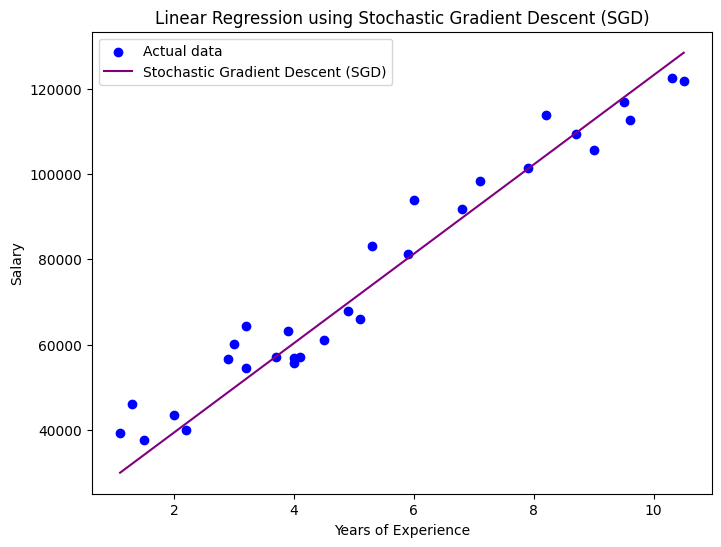

In [16]:
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Initialize and train the Stochastic Gradient Descent model
sgd = SGDRegressor(max_iter=1000, penalty=None, eta0=0.01, random_state=42)
sgd.fit(X, y)

# Predictions
y_pred_sgd = sgd.predict(X)

# Compute loss (MSE)
loss_sgd = mean_squared_error(y, y_pred_sgd)
print(f"Loss (MSE) for Linear Regression using Stochastic Gradient Descent (SGD): {loss_sgd}")

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X, y, color='blue', label='Actual data')
plt.plot(X, y_pred_sgd, color='purple', label='Stochastic Gradient Descent (SGD)')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Linear Regression using Stochastic Gradient Descent (SGD)')
plt.legend()
plt.show()
